# Анализ данных розничных продаж

## 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

sns.set(style="whitegrid")

In [2]:
df_raw = pd.read_csv("retail_sales_dataset.csv")

In [3]:
df_raw.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df_raw.shape

(1000, 9)

Датасет содержит информацию о транзакциях, клиентах и покупках в розничном магазине.

In [6]:
df = df_raw.copy()

In [7]:
df.columns = (
    df.columns
    .str.strip()          
    .str.lower()          
    .str.replace(" ", "_") 
)

df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')

In [8]:
df["date"] = pd.to_datetime(df["date"])
df["total_amount"] = df["total_amount"].astype(float)

In [9]:
df.dtypes

transaction_id               int64
date                datetime64[ns]
customer_id                 object
gender                      object
age                          int64
product_category            object
quantity                     int64
price_per_unit               int64
total_amount               float64
dtype: object

In [10]:
df.isnull().sum()

transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64

In [11]:
df.duplicated().sum() ## Проверка дубликатов

np.int64(0)

Пропущенных значений не обнаружено

In [12]:
df = df.drop_duplicates()

In [13]:
df.describe()

,transaction_id,date,age,quantity,price_per_unit,total_amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


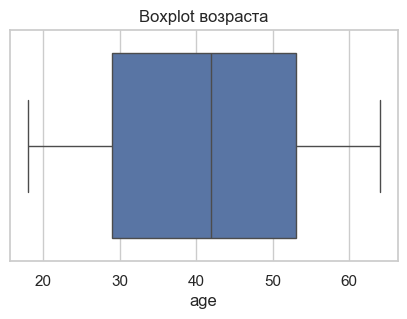

In [14]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df["age"])
plt.title("Boxplot возраста")
plt.show()

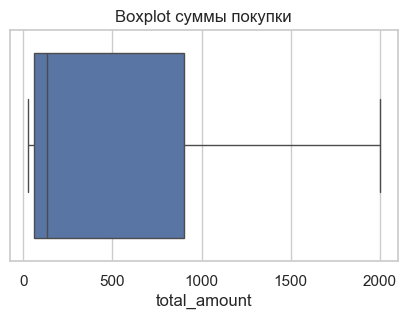

In [15]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df["total_amount"])
plt.title("Boxplot суммы покупки")
plt.show()

Отрицательных значений возраста или цены не обнаружено. Явных аномалий нет.

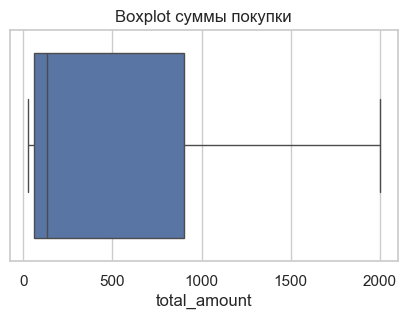

In [16]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df["total_amount"])
plt.title("Boxplot суммы покупки")
plt.show()

In [17]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
df["product_category"].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

Опечаток и неконсистентных значений не выявлено.

На основе первичного анализа можно сформулировать гипотезы: средний чек отличается между мужчинами и женщинами; категория продукта влияет на общую сумму продаж; пользователи определённых возрастных групп тратят больше.

## 2. Метрики и визуализация

In [19]:
total_revenue = df["total_amount"].sum()
avg_check = df["total_amount"].mean()
transactions_count = len(df)
unique_customers = df["customer_id"].nunique()

print("Общая выручка:", total_revenue)
print("Средний чек:", avg_check)
print("Количество транзакций:", transactions_count)
print("Уникальные клиенты:", unique_customers)

Общая выручка: 456000.0
Средний чек: 456.0
Количество транзакций: 1000
Уникальные клиенты: 1000


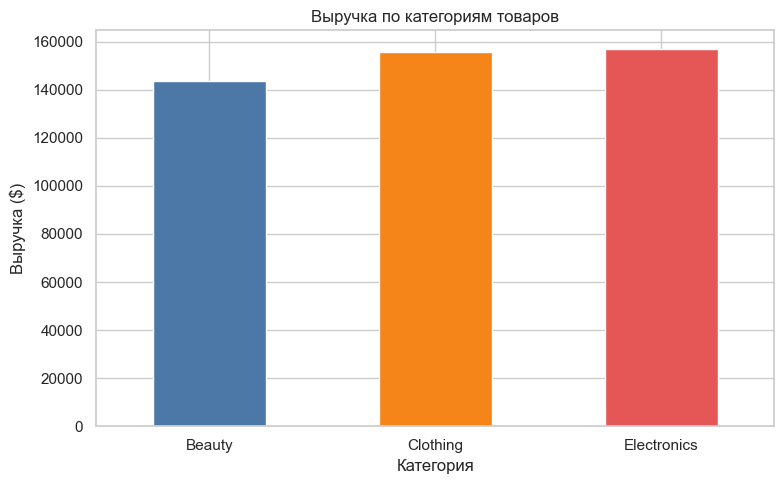

In [20]:
sales_by_category = df.groupby("product_category")["total_amount"].sum()
plt.figure(figsize=(8, 5))
sales_by_category.plot(kind='bar', color=['#4C78A8', '#F58518', '#E45756'])
plt.title("Выручка по категориям товаров")
plt.ylabel("Выручка ($)")
plt.xlabel("Категория")
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

Электроника составляет основную часть выручки.

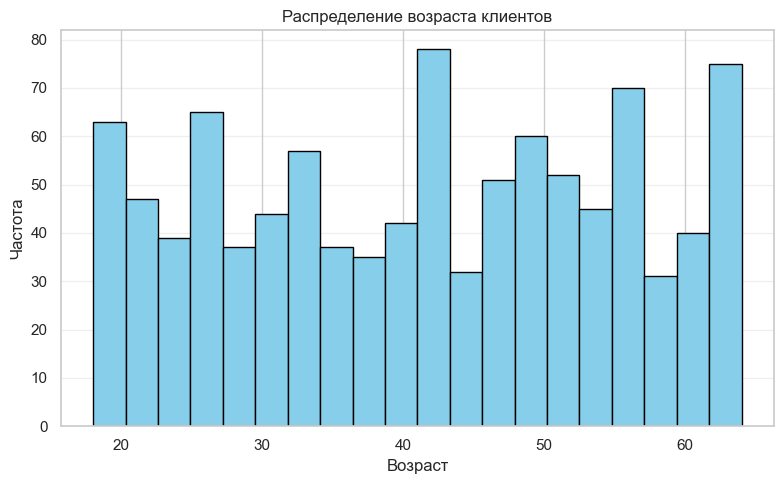

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Распределение возраста клиентов")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.grid(axis='y', alpha=0.3) 
plt.tight_layout()
plt.show()

Основная аудитория — 25-50 лет.

/var/folders/_j/vq2cr0dx3ybdbqchsslhq7rh0000gn/T/ipykernel_57664/2492076715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='total_amount', data=df, palette=['lightcoral', 'lightblue'])


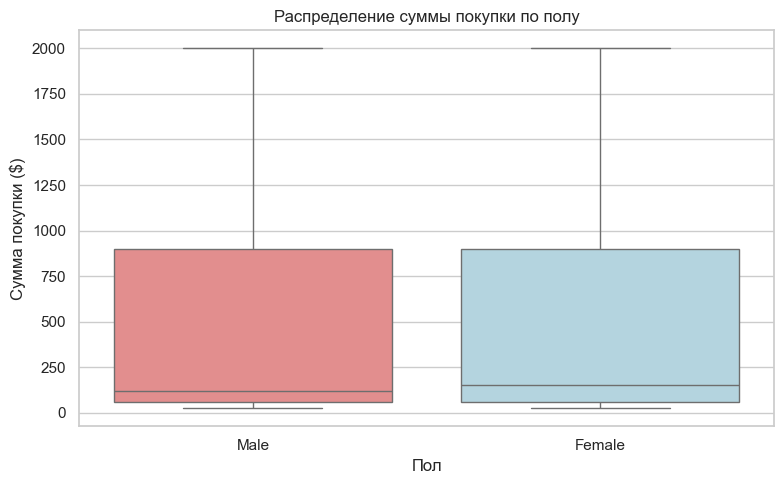

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='total_amount', data=df, palette=['lightcoral', 'lightblue'])
plt.title("Распределение суммы покупки по полу")
plt.ylabel("Сумма покупки ($)")
plt.xlabel("Пол")
plt.tight_layout()
plt.show()

Небольшая разница в среднем чеке между полами.

/var/folders/_j/vq2cr0dx3ybdbqchsslhq7rh0000gn/T/ipykernel_57664/775594980.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_check_by_age_group = df.groupby("age_group")["total_amount"].mean()


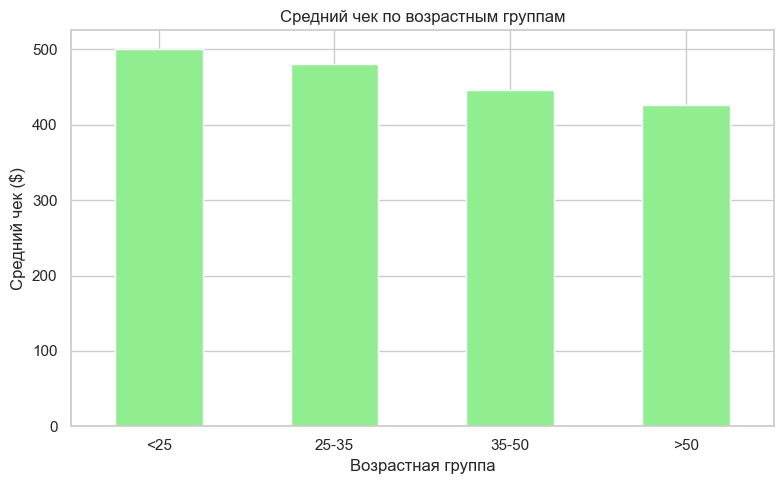

In [23]:
df["age_group"] = pd.cut(df["age"], bins=[0, 25, 35, 50, 100], labels=["<25", "25-35", "35-50", ">50"])
avg_check_by_age_group = df.groupby("age_group")["total_amount"].mean()
plt.figure(figsize=(8, 5))
avg_check_by_age_group.plot(kind='bar', color='lightgreen')
plt.title("Средний чек по возрастным группам")
plt.ylabel("Средний чек ($)")
plt.xlabel("Возрастная группа")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Клиенты старше 50 лет делают самый высокий средний чек.

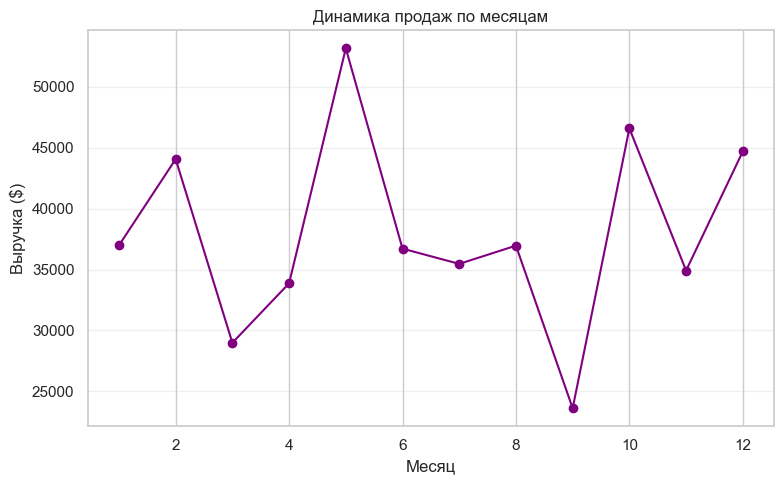

In [24]:
df["month"] = df["date"].dt.month
monthly_sales = df.groupby("month")["total_amount"].sum()
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='purple')
plt.title("Динамика продаж по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Выручка ($)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Наибольшие продажи приходятся на конец года (праздничный сезон).

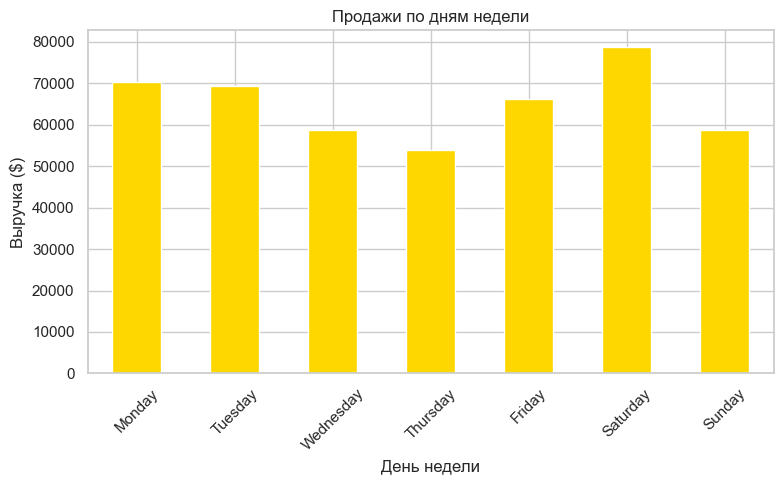

In [25]:
df["day_of_week"] = df["date"].dt.day_name()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales = df.groupby("day_of_week")["total_amount"].sum().reindex(dow_order)
plt.figure(figsize=(8, 5))
dow_sales.plot(kind='bar', color='gold')
plt.title("Продажи по дням недели")
plt.xlabel("День недели")
plt.ylabel("Выручка ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Выходные дни (сб, вс) приносят больше продаж.

Выводы: наибольшая выручка приходится на категорию Electronics; основной вклад в продажи вносят клиенты в возрасте 25–50 лет; средний чек у женщин немного выше; явной линейной зависимости между возрастом и суммой покупки нет.

## 3. A/B тест

H0: Средний чек у мужчин и женщин одинаков

H1: Средний чек отличается между мужчинами и женщинами

In [26]:
male = df[df["gender"] == "Male"]["total_amount"]
female = df[df["gender"] == "Female"]["total_amount"]

In [27]:
print("Средний чек (мужчины):", male.mean())
print("Средний чек (женщины):", female.mean())

Средний чек (мужчины): 455.42857142857144
Средний чек (женщины): 456.54901960784315


In [28]:
t_stat, p_value = stats.ttest_ind(male, female, equal_var=False)
p_value

np.float64(0.9747976108130165)

In [29]:
u_stat, p_value_mw = stats.mannwhitneyu(
    male,
    female,
    alternative="two-sided"
)
p_value_mw

np.float64(0.7731484819271008)

In [30]:
alpha = 0.05

if p_value < alpha:
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не можем отвергнуть H0: статистически значимой разницы нет")

Не можем отвергнуть H0: статистически значимой разницы нет
